<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b>Independent Component Analysis (ICA)</b></p>

<hr style="height:5px;border:none" />

# 1. What is an independent component analysis
<hr style="height:1px;border:none" />

Imagine you have microphones set up at a cocktail party. The audio recordings from these microphones include a mixture of various sounds, originating from various sources, at that party. But, if you have a sufficiently large number of microphones, you can mathematically separate these distinct sources. This is a mathematical problem known as **blind source separation**. An **independent component analysis (ICA)** is one example of such blind source separation methods. In other words, it can separate sources of signals from noisy recordings.

<img style="width: 450px; padding: 0px;" src="https://github.com/ellieshuojin/JupyterNotebook/blob/master/images/ICA_Mixture.png?raw=true" alt="ICA"/>

An ICA is very similar to a PCA, in a sence that both attemt to summarize observed signals in a set of low-dimension components. However there are a couple of main differences:

  * PCA components are *uncorrelated* with each other. ICA components are *statistically independent* from each other. 
  * PCA components can be ordered according to the amount of variability explained. ICA components have no ordering.
 

# 2. Example
<hr style="height:1px;border:none" />

## Data
To demonstrate ICA, we will use a simulated data set with 3 known sources. 

In [1]:
%matplotlib inline

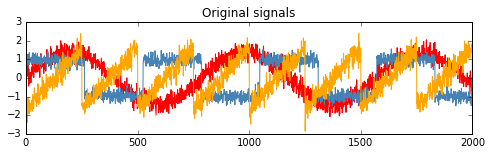

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

########## GENERATING DATA ####################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

############ PLOTTING THE DATA #################
# Original signals
colors = ['red', 'steelblue', 'orange']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), S[:,iSignal], color=colors[iSignal])
plt.title('Original signals')
plt.show()

As you can see, the original signal sources are a sinusoid wave, a square wave, and a sawtooth wave. 

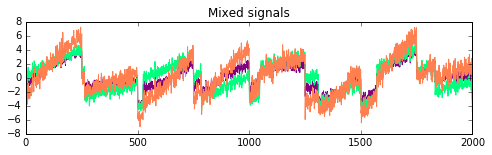

In [3]:
# mixed signals
mcolors = ['purple', 'springgreen','coral']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), X[:,iSignal], color=mcolors[iSignal])
plt.title('Mixed signals')
plt.show()

However, when they are mixed together, and recoded from three *virtual* microphones, the original signals may not be apparent.

The original signal sources are not uncorrelated, but their correlations are somewhat attenuated.

In [4]:
# Correlation coefficients, original signals
print(np.corrcoef(S,rowvar=False))

[[ 1.          0.08219193 -0.01996922]
 [ 0.08219193  1.         -0.0673361 ]
 [-0.01996922 -0.0673361   1.        ]]


The mixed signals are highly correlated among themselves due to the shared signal sources.

In [5]:
# Correlation coefficients, mixed signals
print(np.corrcoef(X,rowvar=False))

[[ 1.          0.88736129  0.96178828]
 [ 0.88736129  1.          0.7706318 ]
 [ 0.96178828  0.7706318   1.        ]]


## ICA

For ICA in our example, we will use a transformation object **`FastICA`** under **`sklern.decompositon`**. Now, we shall apply an ICA to the simulated data described above. Here, we specify the number of components **`n_components=3`**.

In [6]:
# ######### ICA FIRST #########################
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)  

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


And let's plot the resulting ***ICs*** (***independent components***). 

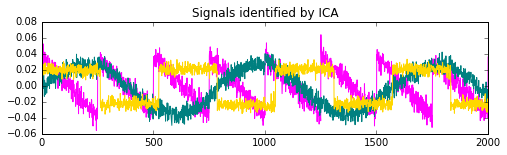

In [7]:
# plotting ICs
pcolors = ['fuchsia','teal','gold']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), X_ica[:,iSignal], color=pcolors[iSignal])
plt.title('Signals identified by ICA')
plt.show()

As you can see, the original signals are recovered. Since ICs do not have any ordering, you need to have some knowledge about the underlying signals in order to interpret ICA results.

As a comparison, we also run a PCA with the same data, and the same number of components.

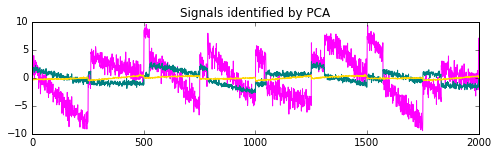

In [8]:
# ######### PCA NEXT #########################
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)  

# plotting PCs
pcolors = ['fuchsia','teal','gold']
plt.figure(figsize=[8,2])
for iSignal in range(3):
    plt.plot(np.arange(1,n_samples+1), X_pca[:,iSignal], color=pcolors[iSignal])
plt.title('Signals identified by PCA')
plt.show()
